### Incremental Training Experiment

This compares how well the Orthogonal Subspace Fine-Tuning (OSFT) continual training method works when it trains a network on chunks of a dataset at a time versus the entire dataset all at once.
OSFT works by decomposing 2D matrices with SVD, and freezing some $r$ amount of high-singular values and their corresponding singular vectors.
This allows us to freeze the values which correspond with the greatest amount of change or variance in the matrix, while training those which do not vary all that much.


We have the following experimental setup:

### **Baseline**:

Baseline is the `meta-llama/Llama-3.1-8B-Instruct` model out of the box, checking its accuracy on the QuaLITY benchmark in a closed-book scenario. 

### **Experiment**: Taking a dataset we generated for this benchmark, we train a model sequentially with OSFT on 3 equivalently-sized chunks of the dataset at a time.

**Control**: To control for this, we also train a model with the same OSFT hyperparameters on the entire dataset
**Control #2**: We also train a model with standard SFT (same exact dataset + hyperparams)
**Control #3 (TBD)**: We sequentially train the model with standard SFT

### Evals

- **Task evaluation**: We evaluate using our standard QuaLITY evaluation script
- **General performance eval**: Leaderboard v2 is used to measure model performance across a range of different domains

### Hyperparams

- LR: 5e-6
- Batch Size: 128
- LR Scheduler: cosine
- Epochs: 1, 2
- (OSFT) rank ratio: 0.5
- warmup steps: 0


### Results

**Results on QuaLITY** (EntityGraph)
	
| Experiment                                                       | Attempt Rate | Accuracy Among Attempted | Overall Accuracy | Total Attempt Rate |
| :--------------------------------------------------------------- | -----------: | -----------------------: | ---------------: | -----------------: |
| Llama-3.1-8b-instruct-baseline                                   |       0.9976 |                   0.4179 |           0.4169 |              0.973 |
| First Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, RR=0.5)        |            1 |                   0.4361 |           0.4361 |             0.9976 |
| Second Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5)       |            1 |                   0.4819 |           0.4819 |             0.9979 |
| Third Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5)        |            1 |                    0.506 |            0.506 |             0.9982 |
| OSFT, complete Dataset (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5) |            1 |                    0.494 |            0.494 |             0.9986 |
| SFT baseline (BS 128, LR 5e-6, 1 epoch, cosine LR)               |            1 |                   0.5181 |           0.5181 |              0.998 |

Now we assess each checkpoint's leaderboard score. For this evaluation, I used the evaluation script located in https://github.com/instructlab/eval/blob/main/scripts/evaluate_best_checkpoint.py, using only default settings.

| Experiment                                                 | Overall   | BBH       | GPQA      | MMLU-Pro  | MUSR      | IFEval    | MATH-Hard |
| ---------------------------------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- |
| meta-llama/Llama-3.1-8b-instruct baseline                  | 41.72     | **51.01** | 27.25     | 37.78     | 38.57     | **77.55** | **18.13** |
| First Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, RR=0.5)  | **42.61** | 50.01     | **31.91** | **37.87** | 43.06     | 76.61     | 16.19     |
| Second Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5) | 41.28     | 49.18     | 30.06     | **37.87** | **44.51** | 71.35     | 14.71     |
| Third Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5)  | 40.70     | 49.51     | 31.77     | 37.06     | 41.19     | 70.40     | 14.29     |
| complete dataset (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5) | 40.93     | 49.00     | 31.90     | 37.39     | 39.61     | 73.32     | 14.35     |
| SFT Baseline                                               | 39.50     | 49.52     | 31.22     | 37.15     | 39.60     | 65.05     | 14.48     |


In [ ]:
# List of matplotlib style options to try (comment/uncomment as needed)
# plt.style.use('default')
# plt.style.use('classic')
# plt.style.use('Solarize_Light2')
# plt.style.use('seaborn')
# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-notebook')
# plt.style.use('seaborn-poster')
# plt.style.use('fivethirtyeight')
# plt.style.use('bmh')
# plt.style.use('dark_background')
# plt.style.use('ggplot')
# plt.style.use('grayscale')
# plt.style.use('fast')
# plt.style.use('tableau-colorblind10')



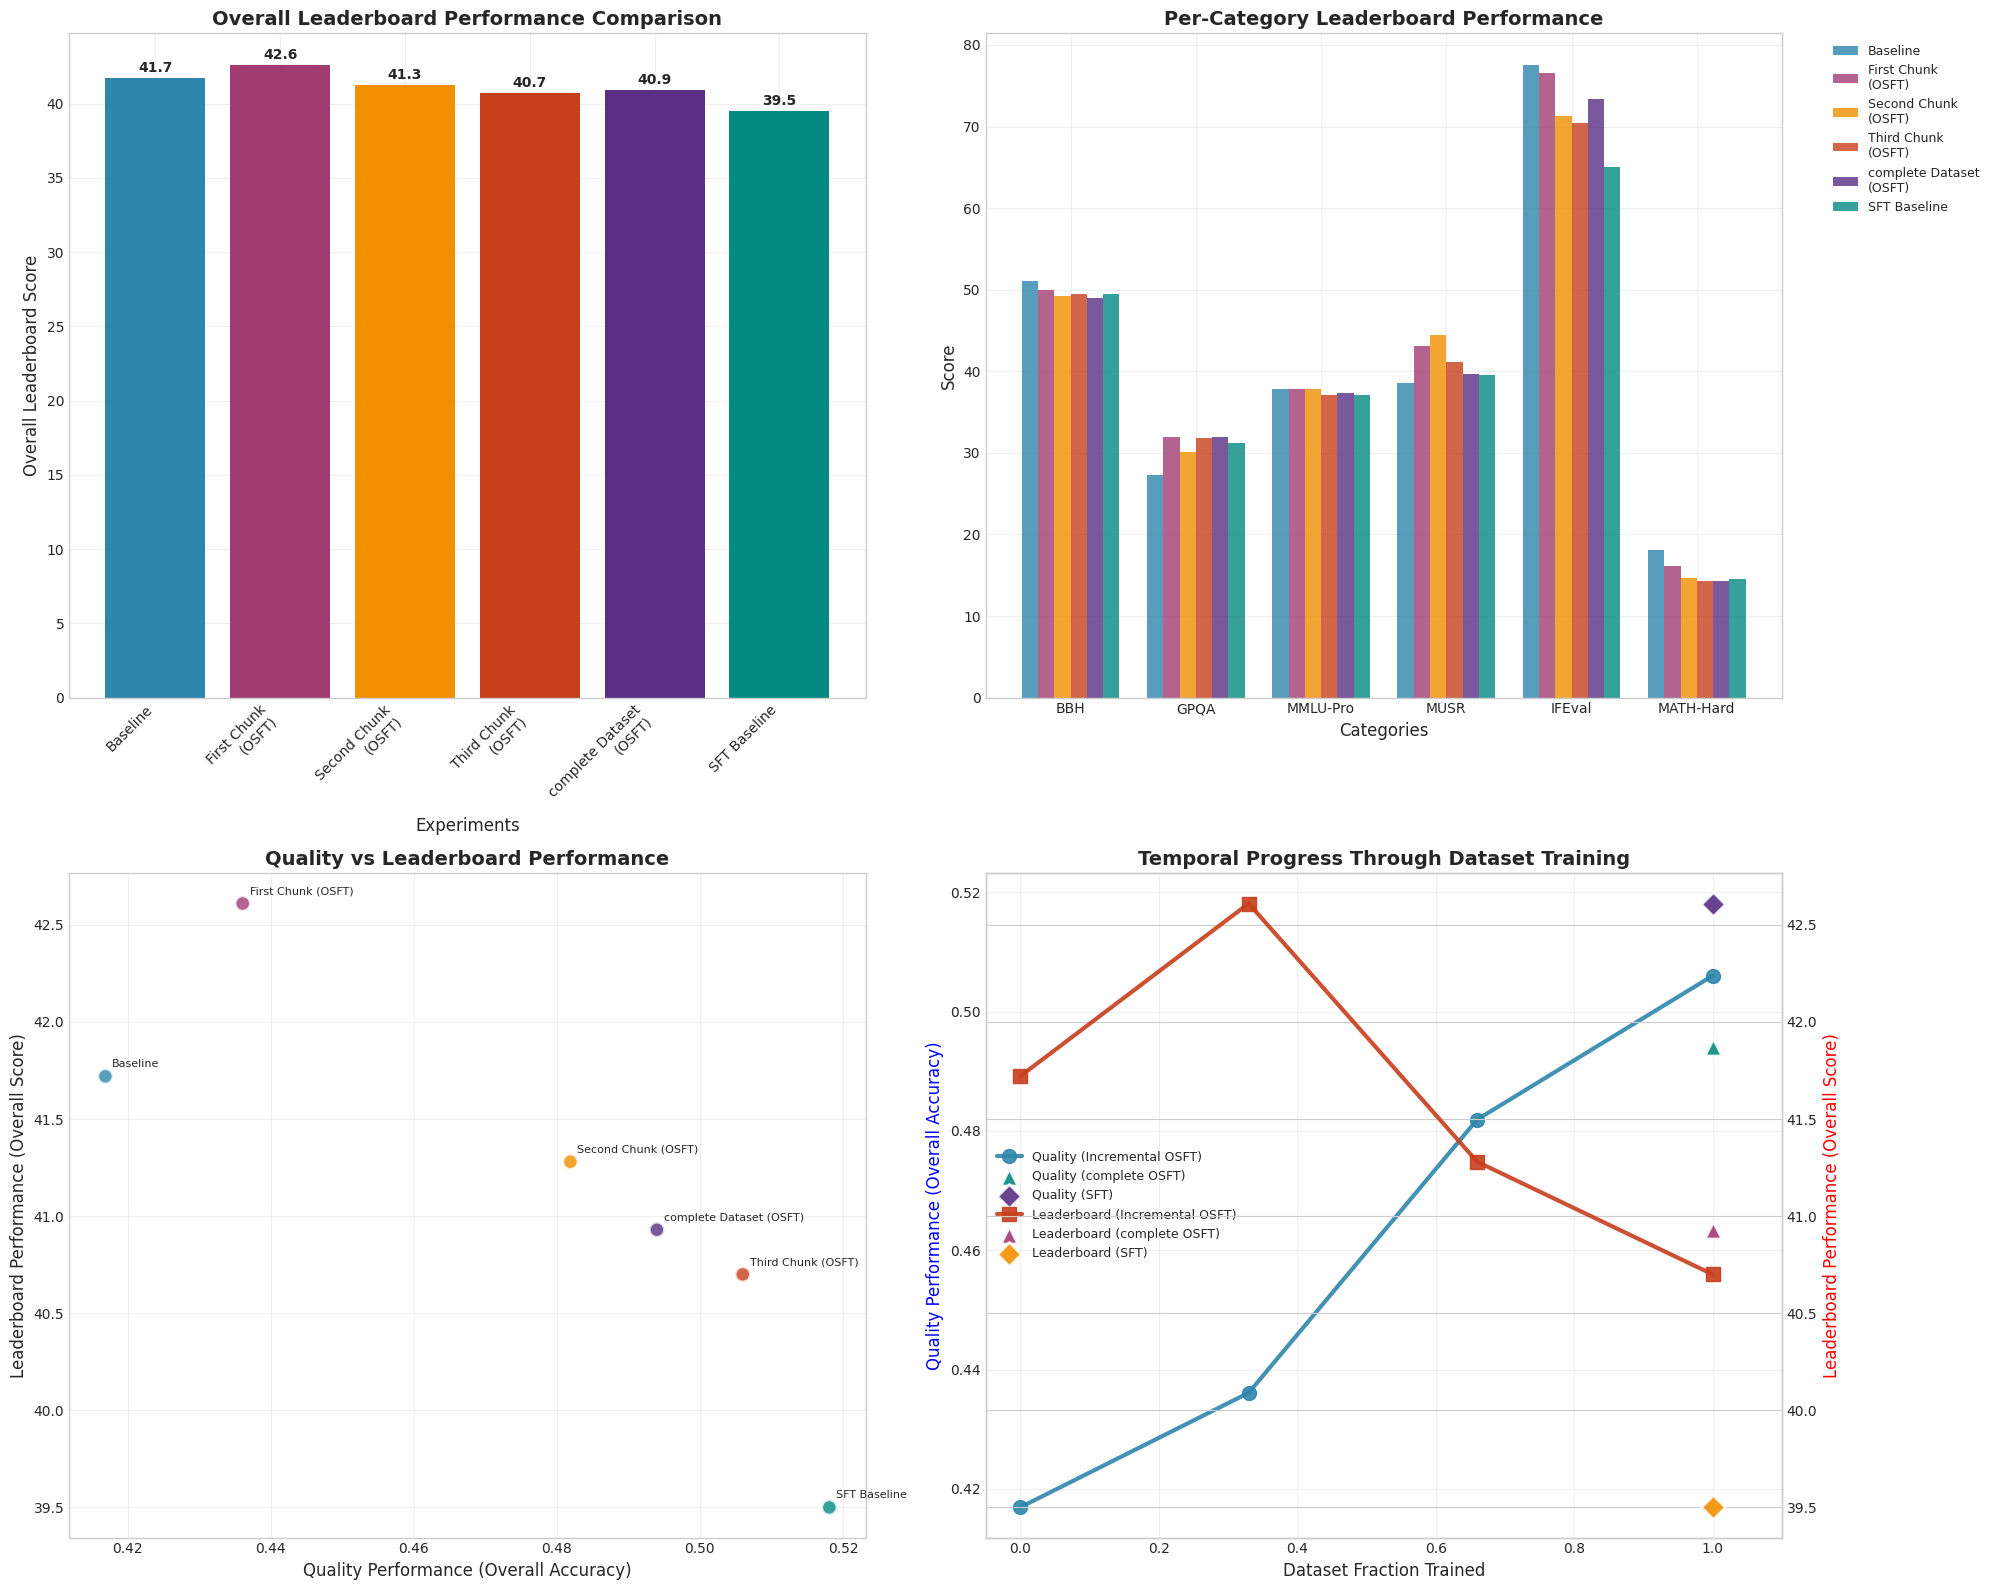

All plots created successcompletey!

Summary of plots:
1. Bar chart: Overall leaderboard performance comparison
2. Bar chart: Per-category leaderboard performance breakdown
3. Scatter plot: Quality vs Leaderboard performance
4. Temporal plot: Training progression through dataset fractions


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Define a professional color palette
professional_colors = [
    '#2E86AB',  # Blue
    '#A23B72',  # Magenta 
    '#F18F01',  # Orange
    '#C73E1D',  # Red
    '#592E83',  # Purple
    '#048A81'   # Teal
]

# Extract the experimental data from the markdown tables above
experiments_data = {
    'Baseline': {
        'quality_accuracy': 0.4169,
        'leaderboard_overall': 41.72,
        'leaderboard_categories': {
            'BBH': 51.01, 'GPQA': 27.25, 'MMLU-Pro': 37.78, 
            'MUSR': 38.57, 'IFEval': 77.55, 'MATH-Hard': 18.13
        },
        'training_stage': 0,  # baseline
        'dataset_fraction': 0.0
    },
    'First Chunk\n(OSFT)': {
        'quality_accuracy': 0.4361,
        'leaderboard_overall': 42.61,
        'leaderboard_categories': {
            'BBH': 50.01, 'GPQA': 31.91, 'MMLU-Pro': 37.87, 
            'MUSR': 43.06, 'IFEval': 76.61, 'MATH-Hard': 16.19
        },
        'training_stage': 1,  # first chunk
        'dataset_fraction': 0.33
    },
    'Second Chunk\n(OSFT)': {
        'quality_accuracy': 0.4819,
        'leaderboard_overall': 41.28,
        'leaderboard_categories': {
            'BBH': 49.18, 'GPQA': 30.06, 'MMLU-Pro': 37.87, 
            'MUSR': 44.51, 'IFEval': 71.35, 'MATH-Hard': 14.71
        },
        'training_stage': 2,  # second chunk
        'dataset_fraction': 0.66
    },
    'Third Chunk\n(OSFT)': {
        'quality_accuracy': 0.506,
        'leaderboard_overall': 40.70,
        'leaderboard_categories': {
            'BBH': 49.51, 'GPQA': 31.77, 'MMLU-Pro': 37.06, 
            'MUSR': 41.19, 'IFEval': 70.40, 'MATH-Hard': 14.29
        },
        'training_stage': 3,  # third chunk
        'dataset_fraction': 1.0
    },
    'complete Dataset\n(OSFT)': {
        'quality_accuracy': 0.494,
        'leaderboard_overall': 40.93,
        'leaderboard_categories': {
            'BBH': 49.00, 'GPQA': 31.90, 'MMLU-Pro': 37.39, 
            'MUSR': 39.61, 'IFEval': 73.32, 'MATH-Hard': 14.35
        },
        'training_stage': 3,  # complete dataset at final stage
        'dataset_fraction': 1.0
    },
    'SFT Baseline': {
        'quality_accuracy': 0.5181,
        'leaderboard_overall': 39.50,
        'leaderboard_categories': {
            'BBH': 49.52, 'GPQA': 31.22, 'MMLU-Pro': 37.15, 
            'MUSR': 39.60, 'IFEval': 65.05, 'MATH-Hard': 14.48
        },
        'training_stage': 3,  # complete dataset baseline
        'dataset_fraction': 1.0
    }
}

# Create a comprehensive figure with all requested plots
fig = plt.figure(figsize=(20, 16))

# 1. Bar chart comparing overall leaderboard performance
ax1 = plt.subplot(2, 2, 1)
exp_names = list(experiments_data.keys())
overall_scores = [experiments_data[exp]['leaderboard_overall'] for exp in exp_names]

colors = professional_colors[:len(exp_names)]
bars1 = ax1.bar(range(len(exp_names)), overall_scores, color=colors)
ax1.set_xlabel('Experiments', fontsize=12)
ax1.set_ylabel('Overall Leaderboard Score', fontsize=12)
ax1.set_title('Overall Leaderboard Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(exp_names)))
ax1.set_xticklabels(exp_names, rotation=45, ha='right', fontsize=10)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars1, overall_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Bar chart comparing per-category leaderboard performance
ax2 = plt.subplot(2, 2, 2)
categories = ['BBH', 'GPQA', 'MMLU-Pro', 'MUSR', 'IFEval', 'MATH-Hard']
x = np.arange(len(categories))
width = 0.13  # Width of bars

for i, exp in enumerate(exp_names):
    scores = [experiments_data[exp]['leaderboard_categories'][cat] for cat in categories]
    offset = (i - len(exp_names)/2 + 0.5) * width
    bars = ax2.bar(x + offset, scores, width, label=exp, color=colors[i], alpha=0.8)

ax2.set_xlabel('Categories', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('Per-Category Leaderboard Performance', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(categories, fontsize=10)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. Scatter plot: Quality (x-axis) vs Leaderboard Performance (y-axis)
ax3 = plt.subplot(2, 2, 3)
quality_scores = [experiments_data[exp]['quality_accuracy'] for exp in exp_names]
leaderboard_scores = [experiments_data[exp]['leaderboard_overall'] for exp in exp_names]

scatter = ax3.scatter(quality_scores, leaderboard_scores, c=colors, s=120, alpha=0.8, edgecolors='white', linewidth=2)

# Add labels for each point
for i, exp in enumerate(exp_names):
    ax3.annotate(exp.replace('\n', ' '), 
                (quality_scores[i], leaderboard_scores[i]), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, ha='left', va='bottom')

ax3.set_xlabel('Quality Performance (Overall Accuracy)', fontsize=12)
ax3.set_ylabel('Leaderboard Performance (Overall Score)', fontsize=12)
ax3.set_title('Quality vs Leaderboard Performance', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Temporal plot showing progression through dataset training
ax4 = plt.subplot(2, 2, 4)

# Organize data for temporal plot - progression through training stages
temporal_data = []
# Baseline
temporal_data.append(('Baseline', 0.0, experiments_data['Baseline']['quality_accuracy'], 
                      experiments_data['Baseline']['leaderboard_overall']))
# First chunk
temporal_data.append(('First Chunk', 0.33, experiments_data['First Chunk\n(OSFT)']['quality_accuracy'], 
                      experiments_data['First Chunk\n(OSFT)']['leaderboard_overall']))
# Second chunk  
temporal_data.append(('Second Chunk', 0.66, experiments_data['Second Chunk\n(OSFT)']['quality_accuracy'], 
                      experiments_data['Second Chunk\n(OSFT)']['leaderboard_overall']))
# Third chunk
temporal_data.append(('Third Chunk', 1.0, experiments_data['Third Chunk\n(OSFT)']['quality_accuracy'], 
                      experiments_data['Third Chunk\n(OSFT)']['leaderboard_overall']))

# Extract data for plotting
fractions = [item[1] for item in temporal_data]
quality_vals = [item[2] for item in temporal_data]
leaderboard_vals = [item[3] for item in temporal_data]

# Add the complete dataset experiments at the rightmost position
complete_osft_quality = experiments_data['complete Dataset\n(OSFT)']['quality_accuracy']
complete_osft_leaderboard = experiments_data['complete Dataset\n(OSFT)']['leaderboard_overall']
sft_quality = experiments_data['SFT Baseline']['quality_accuracy']
sft_leaderboard = experiments_data['SFT Baseline']['leaderboard_overall']

# Plot the incremental training progression
ax4.plot(fractions, quality_vals, 'o-', linewidth=3, markersize=10, label='Quality (Incremental OSFT)', color='#2E86AB', alpha=0.9)
ax4_twin = ax4.twinx()
ax4_twin.plot(fractions, leaderboard_vals, 's-', linewidth=3, markersize=10, label='Leaderboard (Incremental OSFT)', color='#C73E1D', alpha=0.9)

# Add the complete dataset baselines at x=1.0
ax4.scatter([1.0], [complete_osft_quality], s=150, marker='^', color='#048A81', label='Quality (complete OSFT)', alpha=0.9, edgecolors='white', linewidth=2)
ax4.scatter([1.0], [sft_quality], s=150, marker='D', color='#592E83', label='Quality (SFT)', alpha=0.9, edgecolors='white', linewidth=2)
ax4_twin.scatter([1.0], [complete_osft_leaderboard], s=150, marker='^', color='#A23B72', label='Leaderboard (complete OSFT)', alpha=0.9, edgecolors='white', linewidth=2)
ax4_twin.scatter([1.0], [sft_leaderboard], s=150, marker='D', color='#F18F01', label='Leaderboard (SFT)', alpha=0.9, edgecolors='white', linewidth=2)

ax4.set_xlabel('Dataset Fraction Trained', fontsize=12)
ax4.set_ylabel('Quality Performance (Overall Accuracy)', fontsize=12, color='blue')
ax4_twin.set_ylabel('Leaderboard Performance (Overall Score)', fontsize=12, color='red')
ax4.set_title('Temporal Progress Through Dataset Training', fontsize=14, fontweight='bold')

# Combine legends
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='center left', fontsize=9)

ax4.set_xlim(-0.05, 1.1)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("All plots created successcompletey!")
print("\nSummary of plots:")
print("1. Bar chart: Overall leaderboard performance comparison")
print("2. Bar chart: Per-category leaderboard performance breakdown")  
print("3. Scatter plot: Quality vs Leaderboard performance")
print("4. Temporal plot: Training progression through dataset fractions")
